<a href="https://colab.research.google.com/github/allanstar-byte/FOOD-SECURITY/blob/main/CHUCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOOD SECURITY**

## **1. Defining the Question**

### **a) Specifying the Question**

Our Project will shed some light on the nature of the challenges that agriculture and food systems are facing now and throughout the 21st century, and provides some insights as to what is at stake and what needs to be done. What emerges is that “business as usual” is no longer an option but calls for major transformations in agricultural systems, in rural economies and in how we manage our natural resources.

### **b) Defining the Metric for Success**

The analysis will be considered a success when a high accuracy level is achieved for the prediction of the model

### **c) Understanding the context**

### **d) Recording the Experimental Design**

The experiantal desigh to be used is the CRISP-DM format:

1. Business understanding

2. Data Understanding

3. Data cleaning

4. Exploratory Data Analysis

5. Modeling

6. Evaluation/ Hyperameter tuning

### **e) Data Relevance**

The datasets are large enough to be used for analysis and modelling, thus promising a better outcome.

### **f) Reading the Data**

In [ ]:
# importing libraries
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


In [ ]:
# reading the datasets
df = pd.read_csv('/content/wfpvam_foodprices.csv')
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [ ]:
df['adm0_name'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nig

In [ ]:
df.shape

(1356776, 18)

## **2. Data Understanding**

In [ ]:
# shape of the dataset
df.shape

(1356776, 18)

In [ ]:
# data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356776 entries, 0 to 1356775
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   adm0_id             1356776 non-null  float64
 1   adm0_name           1356776 non-null  object 
 2   adm1_id             1356776 non-null  int64  
 3   adm1_name           916571 non-null   object 
 4   mkt_id              1356776 non-null  int64  
 5   mkt_name            1356776 non-null  object 
 6   cm_id               1356776 non-null  int64  
 7   cm_name             1356776 non-null  object 
 8   cur_id              1356776 non-null  float64
 9   cur_name            1356776 non-null  object 
 10  pt_id               1356776 non-null  int64  
 11  pt_name             1356776 non-null  object 
 12  um_id               1356776 non-null  int64  
 13  um_name             1356776 non-null  object 
 14  mp_month            1356776 non-null  int64  
 15  mp_year        

In [ ]:
# Number of rows for each country

country_unique, country_freq = np.unique(df['adm0_name'], return_counts = True)
listrows = []
for i in range(country_unique.shape[0]):
    
    print(country_unique[i], ': ', country_freq[i])
    listrows.append( [country_unique[i], country_freq[i]])

Afghanistan :  11620
Algeria :  1793
Angola :  1248
Argentina :  918
Armenia :  17938
Azerbaijan :  125
Bangladesh :  5945
Bassas da India :  111482
Belarus :  423
Benin :  25237
Bhutan :  338
Bolivia :  16526
Burkina Faso :  32214
Burundi :  55015
Cambodia :  16577
Cameroon :  12184
Cape Verde :  2087
Central African Republic :  10953
Chad :  16698
China :  1312
Colombia :  18366
Congo :  5257
Costa Rica :  297
Cote d'Ivoire :  7428
Democratic Republic of the Congo :  42409
Djibouti :  5586
Dominican Republic :  2309
Ecuador :  3133
Egypt :  2152
El Salvador :  7606
Eritrea :  100
Ethiopia :  19819
Gabon :  504
Gambia :  42945
Georgia :  80
Ghana :  20969
Guatemala :  3907
Guinea :  9878
Guinea-Bissau :  6977
Haiti :  12510
Honduras :  1581
Indonesia :  52922
Iran  (Islamic Republic of) :  430
Iraq :  20700
Italy :  1
Japan :  1372
Jordan :  20974
Kazakhstan :  3347
Kenya :  6510
Kyrgyzstan :  56761
Lao People's Democratic Republic :  27984
Lebanon :  39286
Lesotho :  8884
Liberia :  

## **3. Data Cleaning**

In [ ]:
#renaming of the columns
df.rename(columns={'adm0_id':'country_id',
                   'adm0_name':'country',
                   'adm1_id':'province_id',
                   'adm1_name':'province',
                   'mkt_id':'city_id',
                   'mkt_name':'city',
                   'cm_id':'food_id',
                   'cm_name':'food',
                   'mp_month':'month',
                   'mp_year':'year',
                   'mp_price':'price',
                   'mp_commoditysource':'source',
                   'um_name':'unit',
                   'cur_name':'currency',
                   'cur_id':'currency_id',
                   'um_id':'unit_id',
                   'pt_name':'purchase_type',
                   'pt_id':'purchase_type_id'},
                   inplace=True)

In [ ]:
# Changing the currency
import warnings
warnings.filterwarnings('ignore')


f1= df[df['country'] == 'Afghanistan']
f1['price'] = f1['price'] * 0.012989

f2= df[df['country'] == 'Algeria']
f2['price'] = f2['price'] * 0.0076

f3= df[df['country'] == 'Angola']
f3['price'] = f3['price'] * 0.0015

f4= df[df['country'] == 'Argentina']
f4['price'] = f4['price'] * 0.012

f5= df[df['country'] == 'Armenia']
f5['price'] = f5['price'] * 0.0019

f6= df[df['country'] == 'Azerbaijan']
f6['price'] = f6['price'] * 0.59

f7= df[df['country'] == 'Bangladesh']
f7['price'] = f7['price'] * 0.012

f8= df[df['country'] == 'Bassas da India']
f8['price'] = f8['price'] * 1.13

f9= df[df['country'] == 'Belarus']
f9['price'] = f9['price'] * 0.40

f10= df[df['country'] == 'Benin']
f10['price'] = f10['price'] * 0.00185240

f11= df[df['country'] == 'Bhutan']
f11['price'] = f11['price'] * 0.014

f12= df[df['country'] == 'Bolivia']
f12['price'] = f12['price'] * 0.14

f13= df[df['country'] == 'Burkina Faso']
f13['price'] = f13['price'] * 0.00185240

f14= df[df['country'] == 'Burindi']
f14['price'] = f14['price'] * 0.00052

f15= df[df['country'] == 'Cambodia']
f15['price'] = f15['price'] * 0.00025

f16= df[df['country'] == 'Cameroon']
f16['price'] = f16['price'] * 0.00185240

f17= df[df['country'] == 'Cape Verde']
f17['price'] = f17['price'] * 0.011

f18 = df[df['country'] == 'Central African Republic']
f18['price'] = f18['price'] * 0.0019

result = pd.concat([f1,f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18])
result


,country_id,country,province_id,province,city_id,city,food_id,food,currency_id,currency,purchase_type_id,purchase_type,unit_id,unit,month,year,price,source
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,0.64945,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,0.64945,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,0.64945,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,0.64945,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,0.64945,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322618,49.0,Central African Republic,67154,Bangui,2806,PK5,543,Laundry detergent - Retail,0.0,XAF,15,Retail,102,Package,6,2020,0.19000,NaN
322619,49.0,Central African Republic,67154,Bangui,2806,PK5,551,Pasta (spaghetti) - Retail,0.0,XAF,15,Retail,75,Packet,3,2020,0.47500,NaN
322620,49.0,Central African Republic,67154,Bangui,2806,PK5,551,Pasta (spaghetti) - Retail,0.0,XAF,15,Retail,75,Packet,4,2020,0.49495,NaN
322621,49.0,Central African Republic,67154,Bangui,2806,PK5,551,Pasta (spaghetti) - Retail,0.0,XAF,15,Retail,75,Packet,5,2020,0.49115,NaN


In [ ]:
# dropping irrelevant columns
result_1 = result.drop(columns={'country_id', 'province_id', 'city_id', 'food_id', 'currency_id', 'purchase_type_id',
                                'unit_id', 'source'}, axis='columns')
result_1.head()

,country,province,city,food,currency,purchase_type,unit,month,year,price
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,0.64945
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,0.64945
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,0.64945
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,0.64945
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,0.64945


In [ ]:
# checking for the null values
result_1.isna().sum()

country               0
province         129883
city                  0
food                  0
currency              0
purchase_type         0
unit                  0
month                 0
year                  0
price                 0
dtype: int64

In [ ]:
# dropping the province column
result_1.drop(columns={'province'}, axis='columns')
# dropping the null values
result_2 = result_1.dropna()
result_2.isna().sum()

country          0
province         0
city             0
food             0
currency         0
purchase_type    0
unit             0
month            0
year             0
price            0
dtype: int64

In [ ]:
# checking for the duplicated values
result_2.duplicated().sum()

0

In [ ]:
# checking for the outliers
result_2.kurt()

month      -1.128948
year        2.624743
price    1899.398246
dtype: float64

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. ... Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers.


In [ ]:
food = result_2.to_csv('food.csv')


## **4. Exploratory Data Analysis**

### **i) Univariate Analysis**

In [ ]:
result_2.columns

Index(['country', 'province', 'city', 'food', 'currency', 'purchase_type',
       'unit', 'month', 'year', 'price'],
      dtype='object')

In [ ]:
result_2.describe(exclude=None,percentiles=None)

,month,year,price
count,137725.000000,137725.000000,137725.000000
mean,6.521169,2015.794721,39.830388
std,3.281994,4.731224,972.242520
min,1.000000,1992.000000,0.002081
25%,4.000000,2014.000000,0.375360
50%,7.000000,2017.000000,0.699281
75%,9.000000,2020.000000,1.687500
max,12.000000,2020.000000,75769.162337


In [ ]:
# testing for skewness of the price column
print("Skewness: %f" % result_2['price'].skew())
print("Kurtosis: %f" % result_2['price'].kurt())

Skewness: 39.124811
Kurtosis: 1899.398246


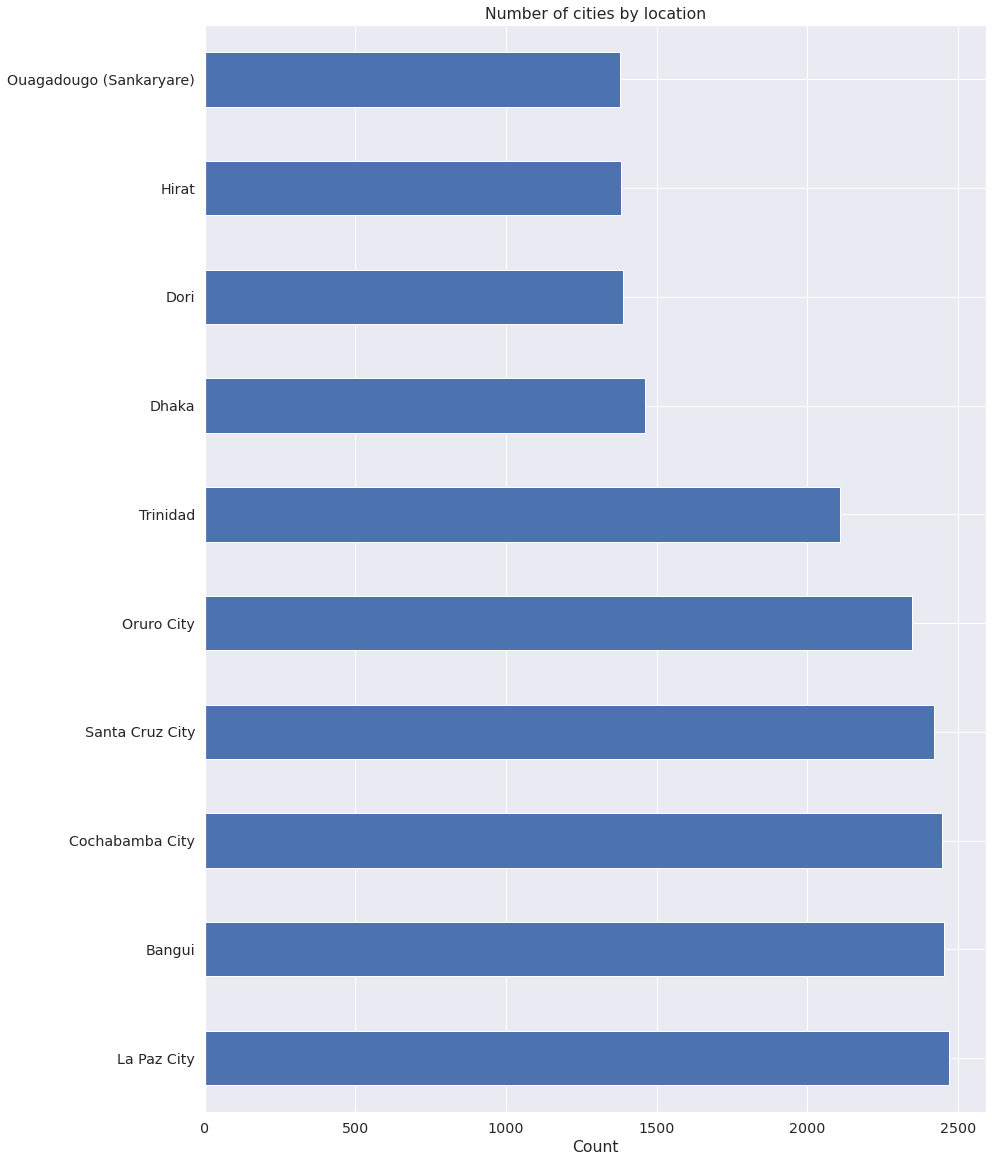

In [ ]:
#analyze the number of restaurants in a location
result_2.city.value_counts().nlargest(10).plot(kind = "barh")
plt.title("Number of cities by location")
plt.xlabel("Count")
plt.show()

The visualization helps to identify the most common cities over the years.

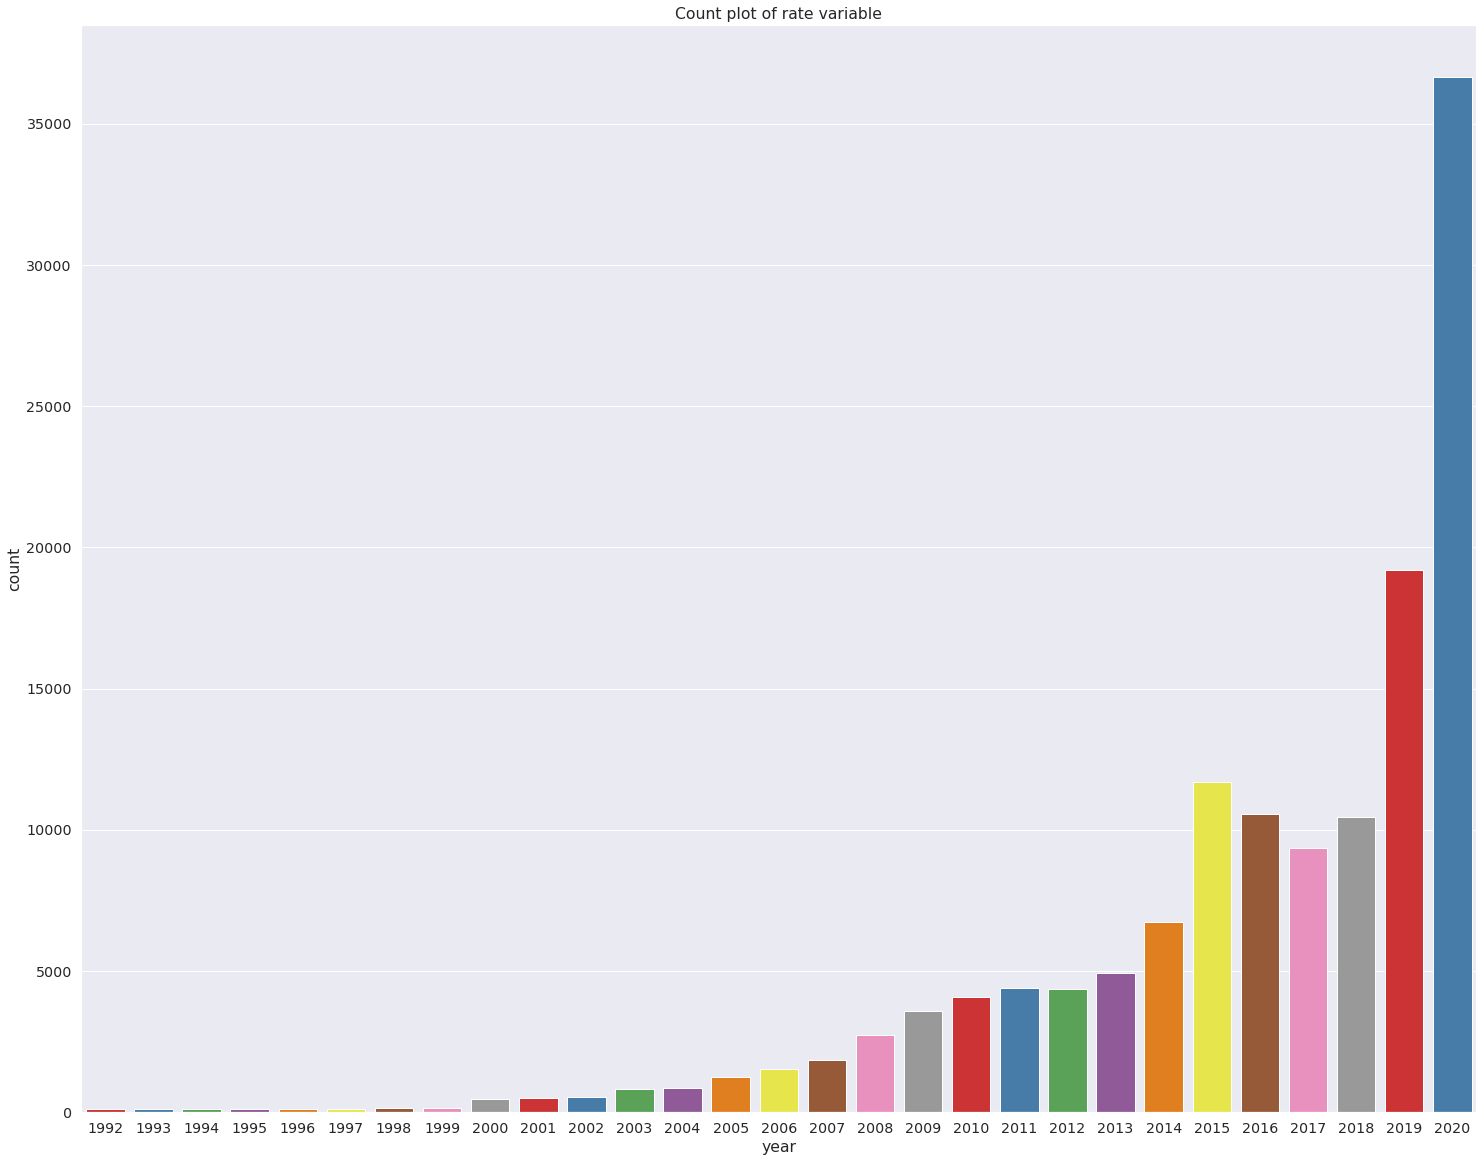

In [ ]:
#plot the count of rating over the years
plt.rcParams['figure.figsize'] = 25,20
sns.countplot(result_2["year"], palette="Set1")
plt.title("Count plot of rate variable")
plt.show()

The food production over the years. The food production has been increasing over the years.

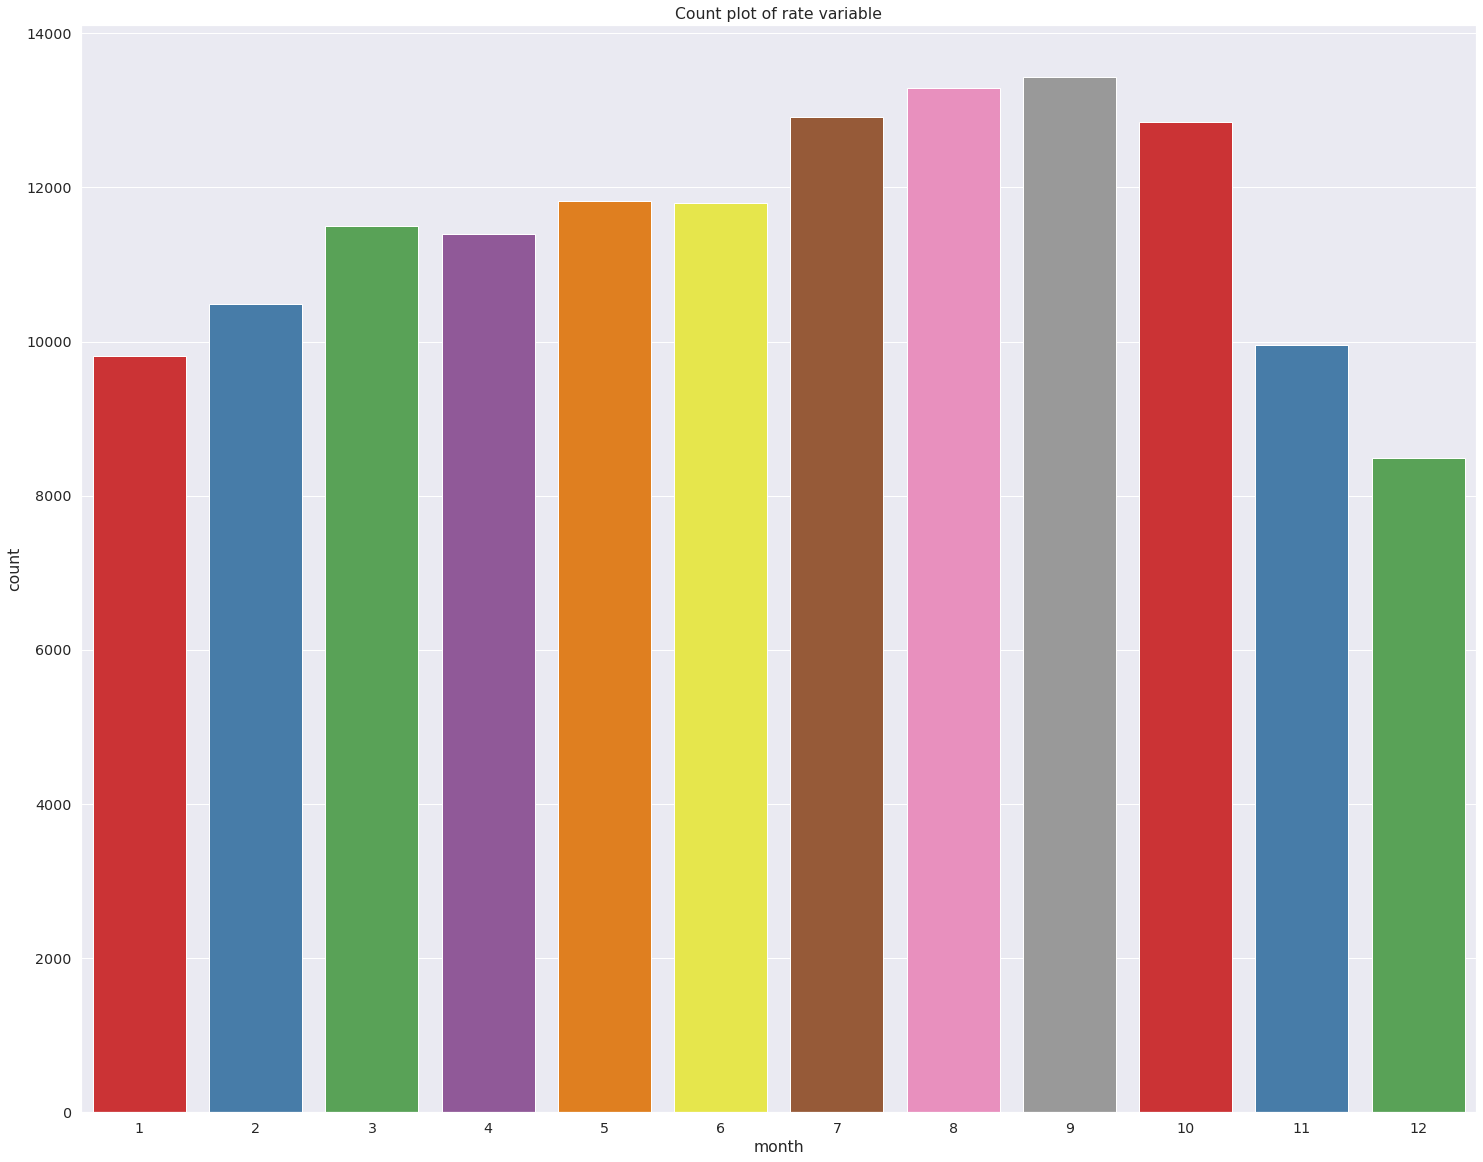

In [ ]:
#plot the count of rating over the months
plt.rcParams['figure.figsize'] = 25,20
sns.countplot(result_2["month"], palette="Set1")
plt.title("Count plot of rate variable")
plt.show()

The food production is usually on peak from month of July to October generally over the years.

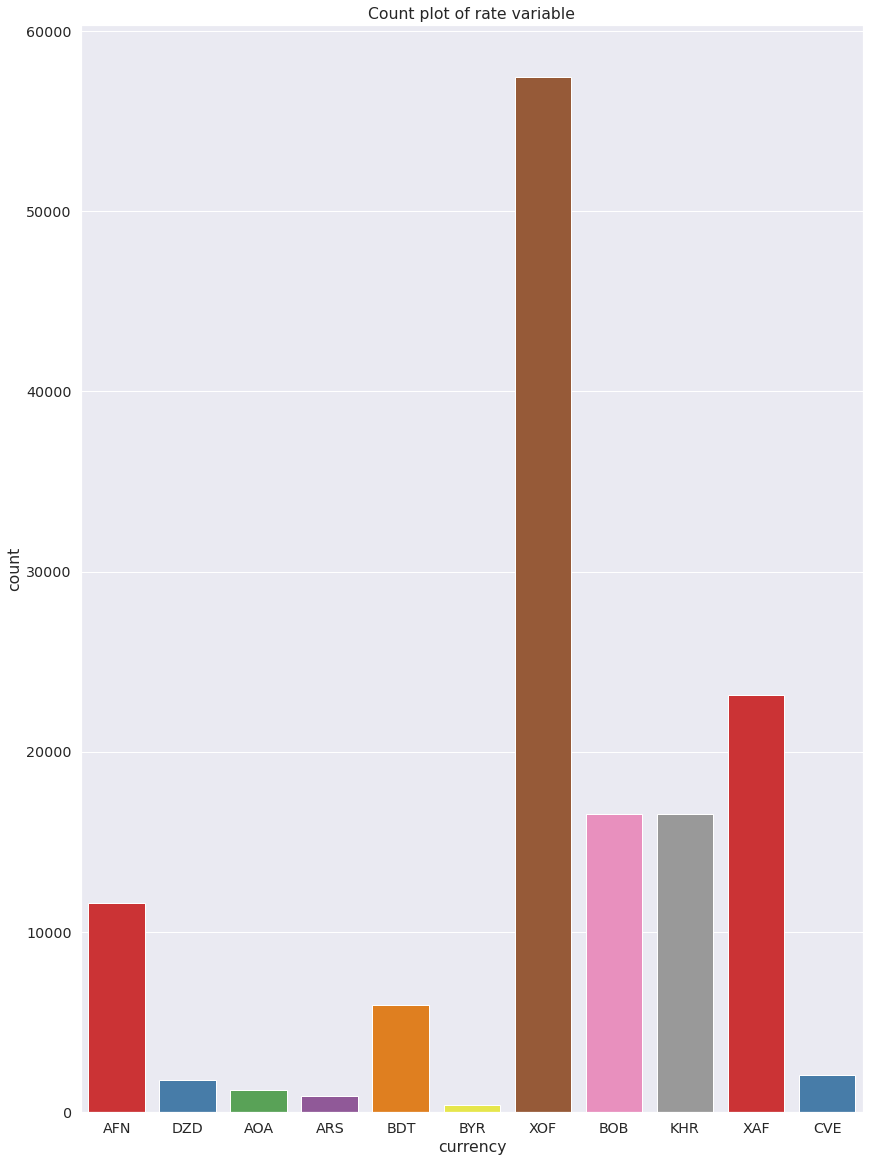

In [ ]:
#plot the count of rating for the currency
plt.rcParams['figure.figsize'] = 14,20
sns.countplot(result_2["currency"], palette="Set1")
plt.title("Count plot of rate variable")
plt.show()

 The west african CFA franc (XOF) has been the one which is commonly used.

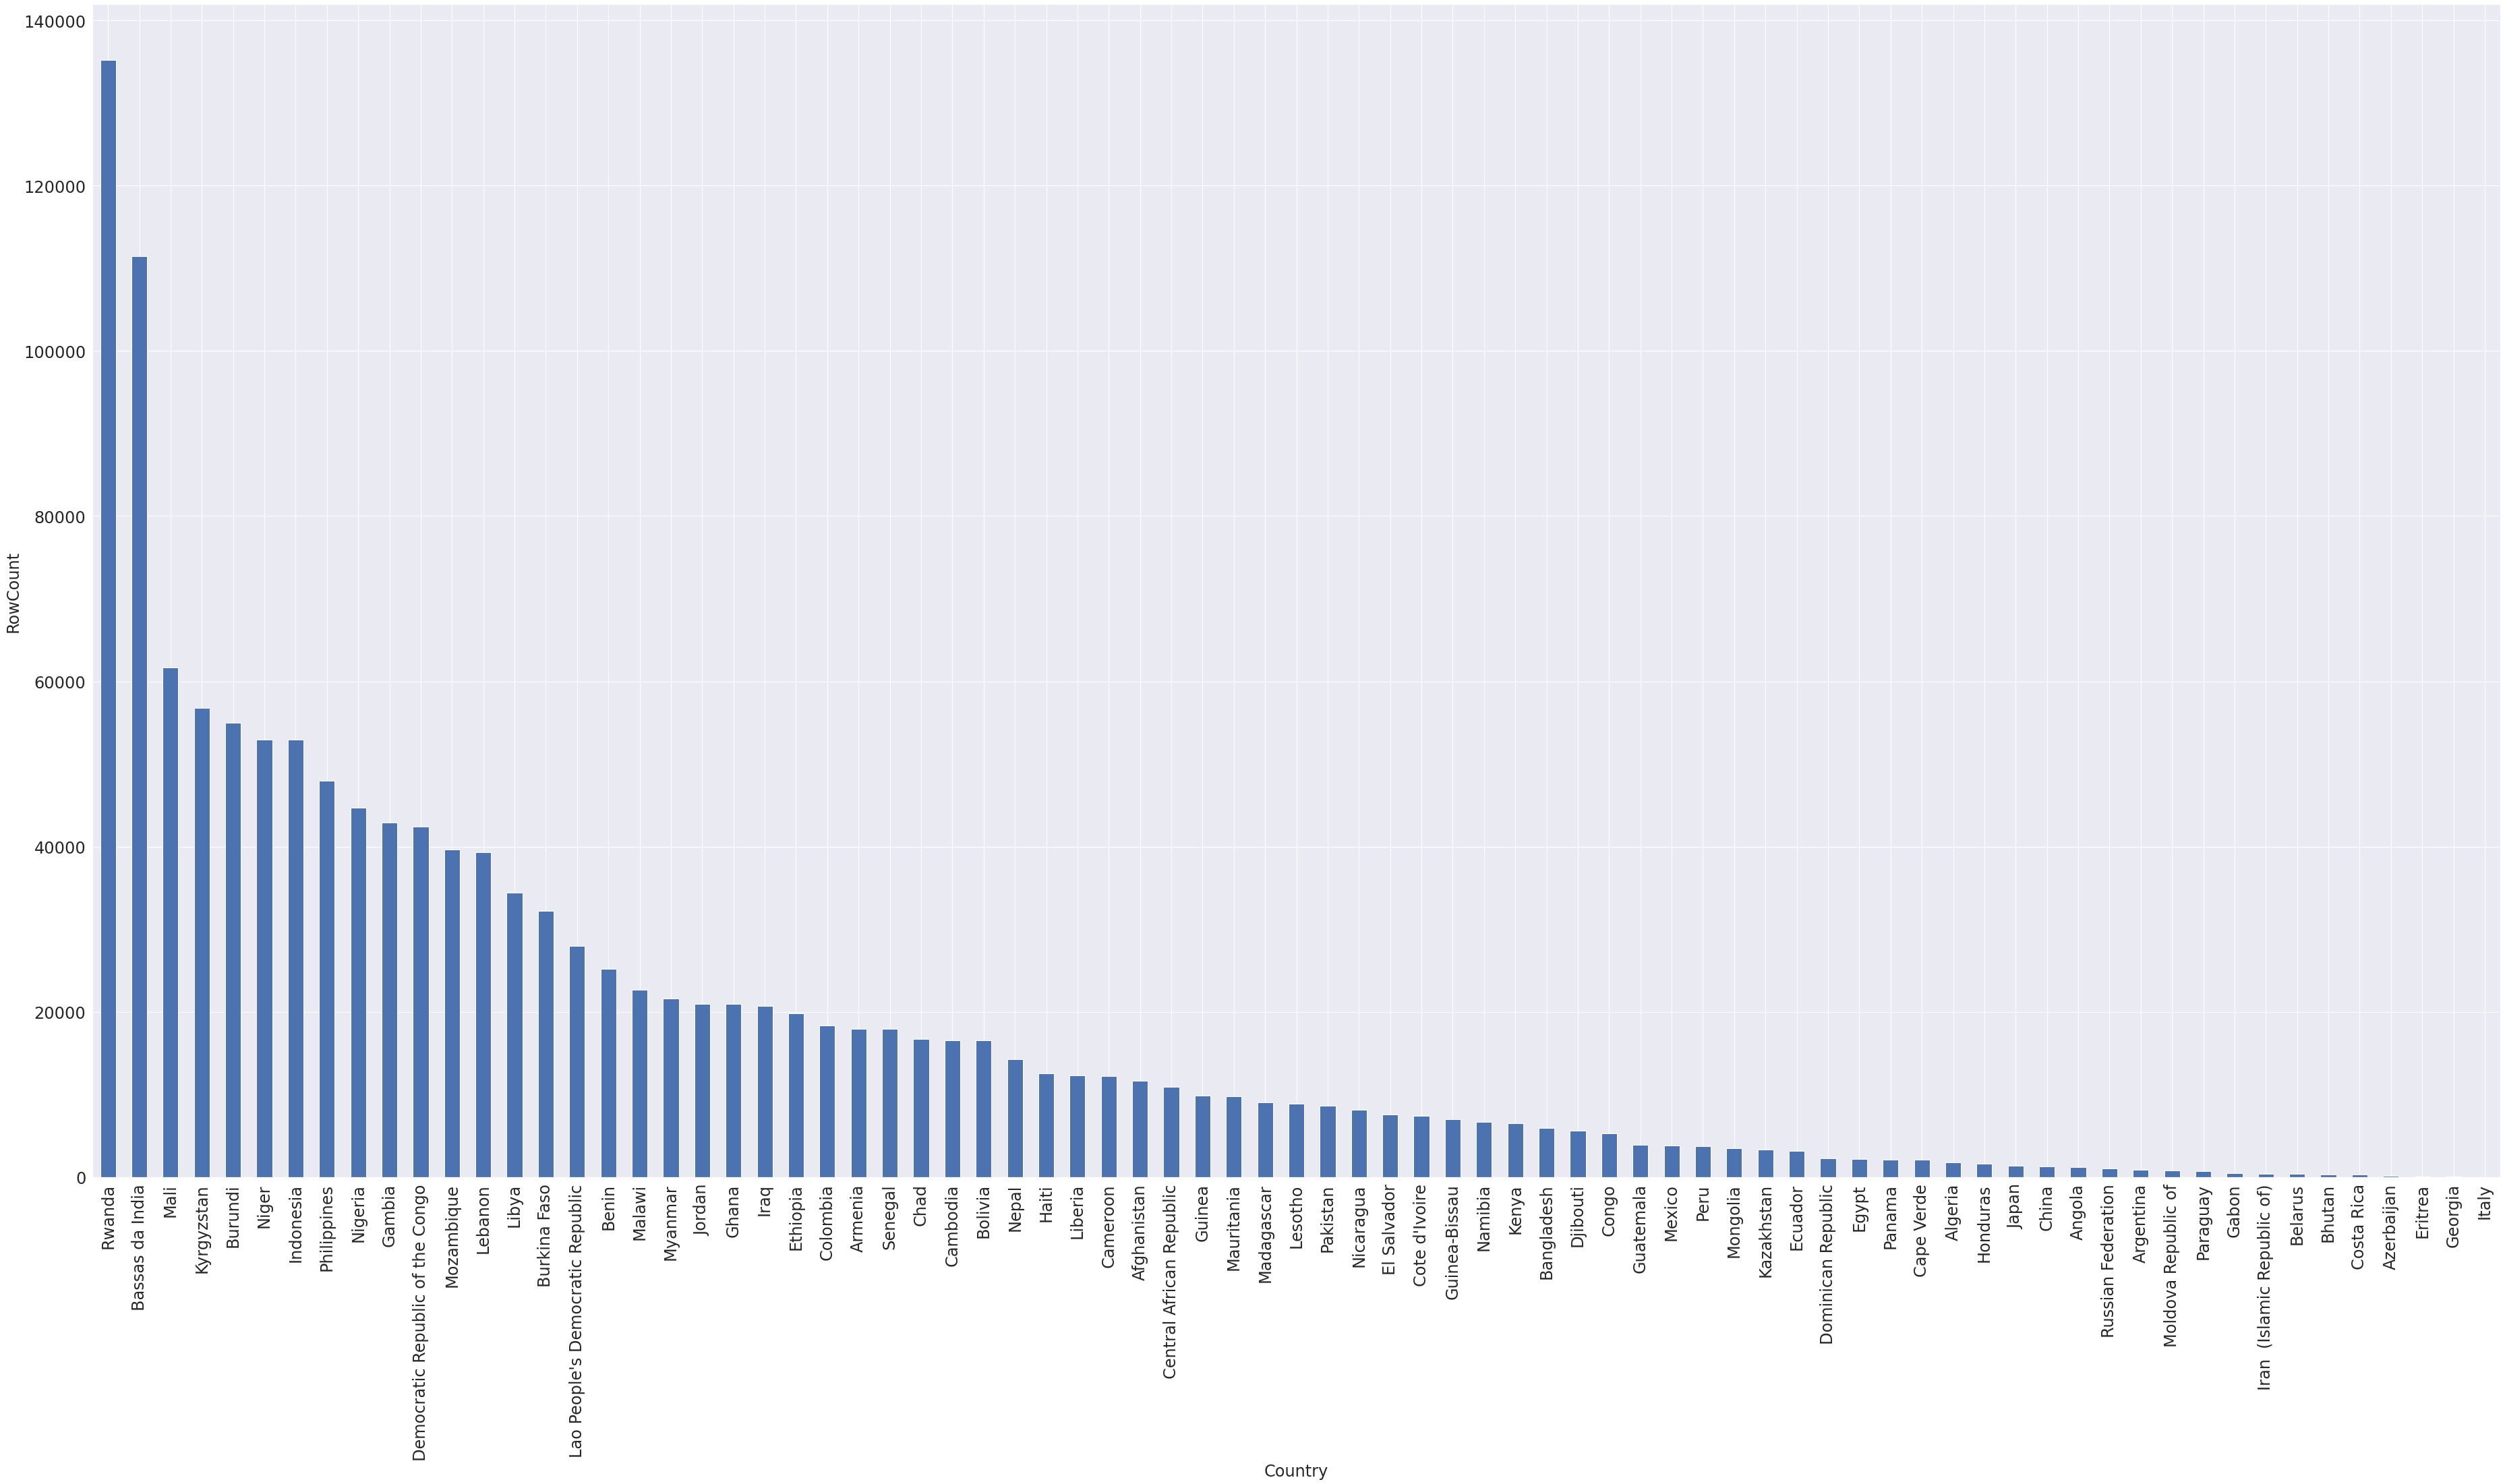

In [ ]:
# plot of the value counts of the countries
df = pd.DataFrame(listrows, columns = ['Country', 'RowCount'])
df= df.sort_values(by=['RowCount'],ascending=False)
ax= df.plot(kind='bar', y = 'RowCount',x ='Country',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("Country",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

This visualization enables us to see the the countries with the highest frequency of prodution.For this case Bassas da india has the highest frequency of food production

Apples - Retail :  80
Bananas - Retail :  80
Beans (black) - Retail :  66
Beans (green, fresh) - Retail :  130
Beans (kidney, pinto) - Retail :  3
Beans (niebe) - Retail :  4879
Beans (niebe) - Wholesale :  882
Beans (red) - Retail :  1235
Beans (white) - Retail :  1613
Beans (yardlong, green) - Retail :  323
Beans (yardlong, green) - Wholesale :  323
Bread (high grade flour) - Retail :  141
Bread (wheat) - Retail :  1165
Bread - Retail :  1781
Cabbage (chinese, flowering) - Retail :  310
Cabbage (chinese, flowering) - Wholesale :  310
Cabbage - Retail :  150
Carrots - Retail :  455
Cassava (cossette) - Retail :  1272
Cassava (cossette) - Wholesale :  443
Cassava (fresh) - Retail :  81
Cassava - Retail :  969
Cassava - Wholesale :  96
Cassava flour - Retail :  288
Cassava meal (gari) - Retail :  1479
Cassava meal (gari, fine) - Retail :  261
Cassava meal (tapioca) - Retail :  706
Charcoal - Retail :  5
Cheese (dry) - Retail :  80
Chicken - Retail :  130
Coconut (dried) - Retail :  662


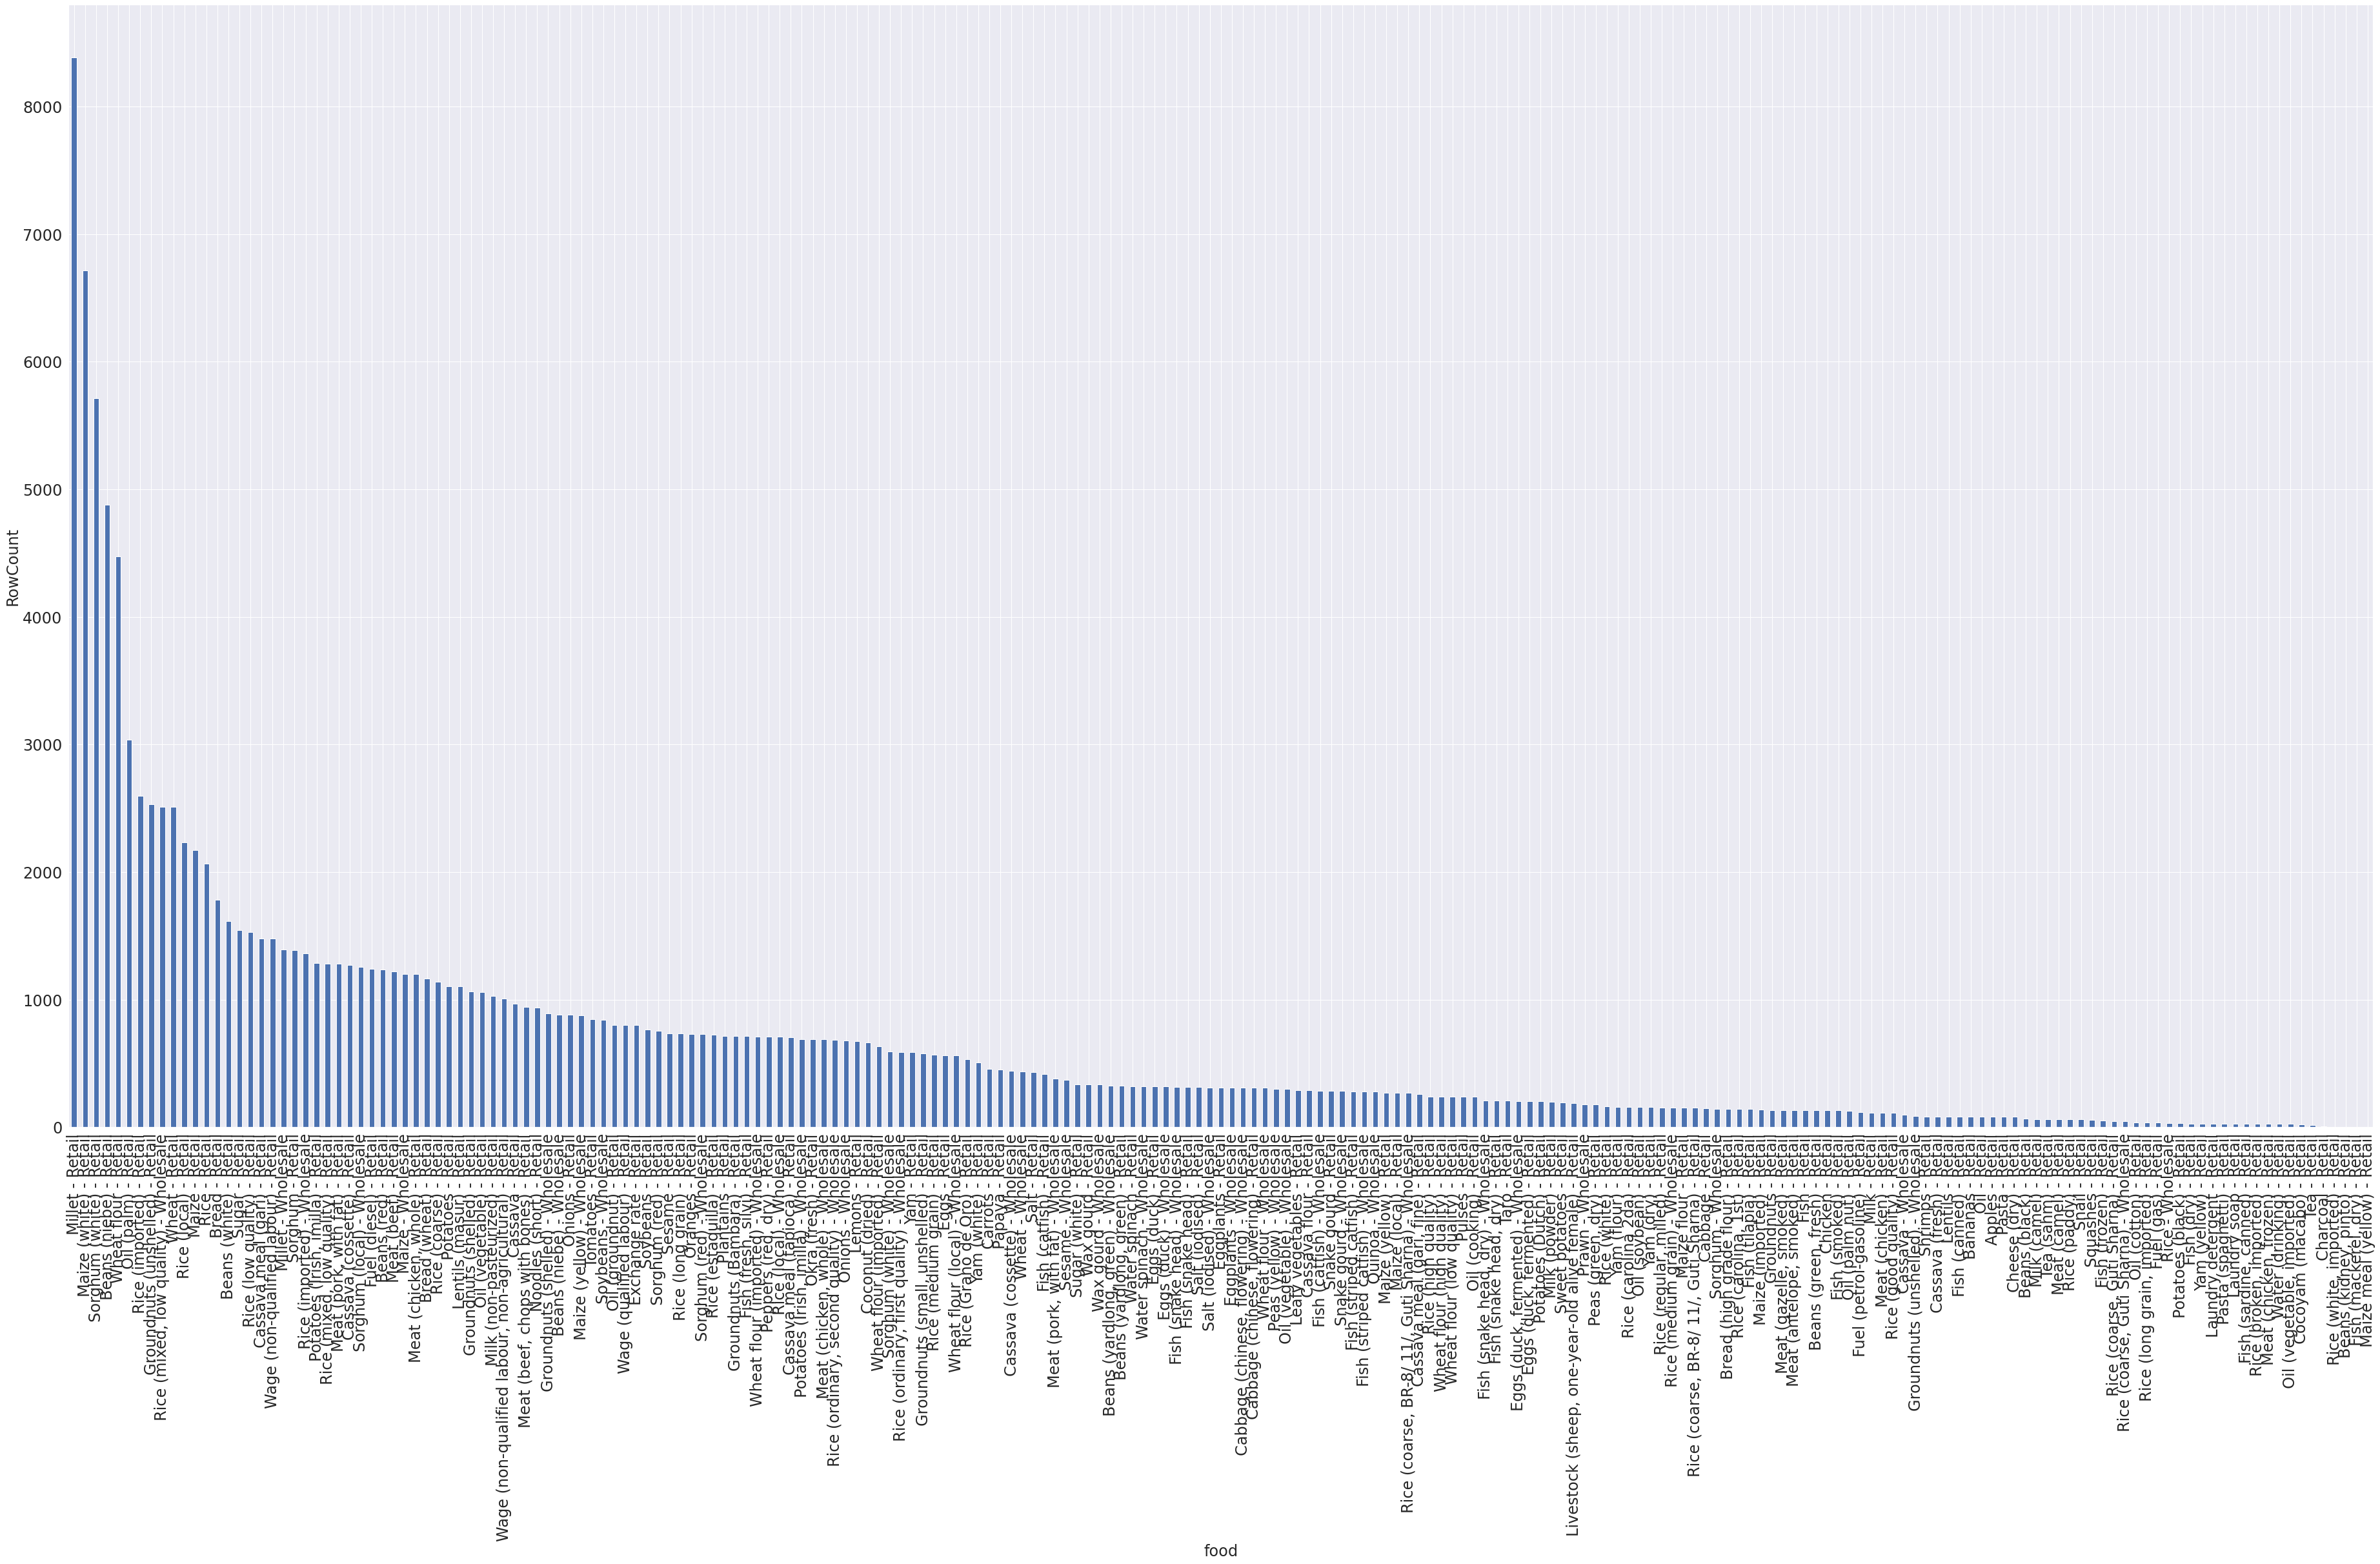

In [ ]:
# Number of rows for each commodity

food_unique, food_freq = np.unique(result_2['food'], return_counts = True)
listrows = []
for i in range(food_unique.shape[0]):
    
    print(food_unique[i], ': ', food_freq[i])
    listrows.append( [food_unique[i], food_freq[i]])

df = pd.DataFrame(listrows, columns = ['food', 'RowCount'])
df= df.sort_values(by=['RowCount'],ascending=False)
ax= df.plot(kind='bar', y = 'RowCount',x ='food',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("food",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

The most consumed product is the millet, maize, sorghum, beans over the countries

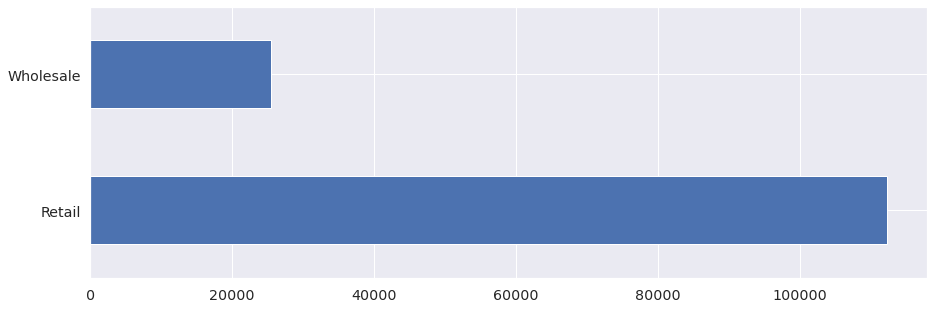

In [ ]:
# plotting for the purchase type
plt.figure(figsize=(15,5))
result_2['purchase_type'].value_counts()[:1000].plot(kind='barh')

The retail is the most common type of purchase used

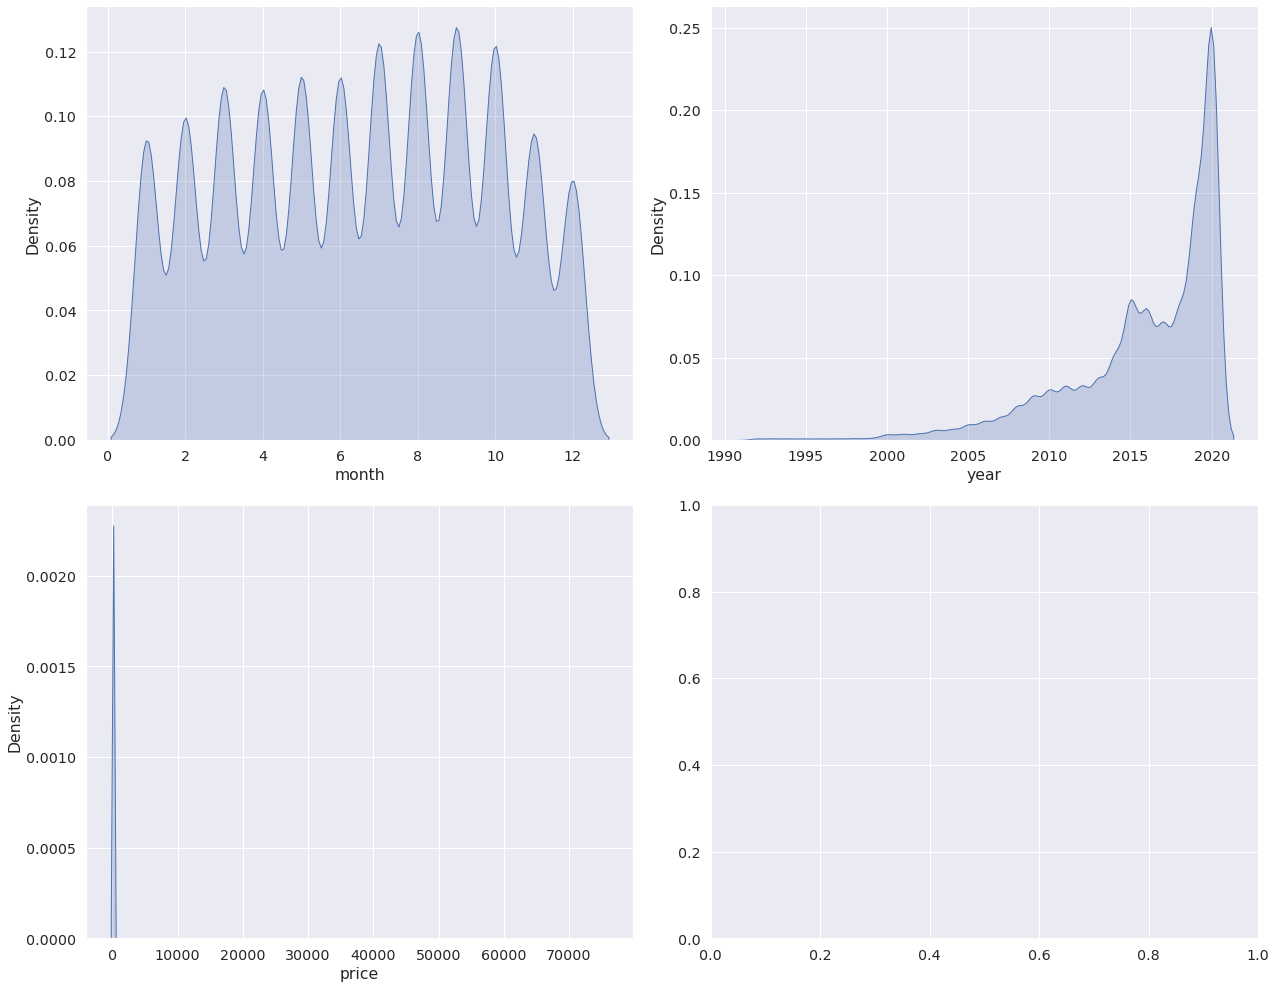

In [ ]:
# Ploting the univariate summaries and recording our observations for the 'month', 'year', 'price'
fi = result_2[['month', 'year', 'price']]
fi_2 = fi.describe()
fi_2 

sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(fi_2 ):
  plot = sns.kdeplot(data=fi, x=c, ax=axes[i], fill=True)
plt.tight_layout()

From the graphs we can observe that the variables don't have a normal distribution.since for a normal distribution has a bell-sahaped figure around the mean.

### **ii) Bivariate Analysis**

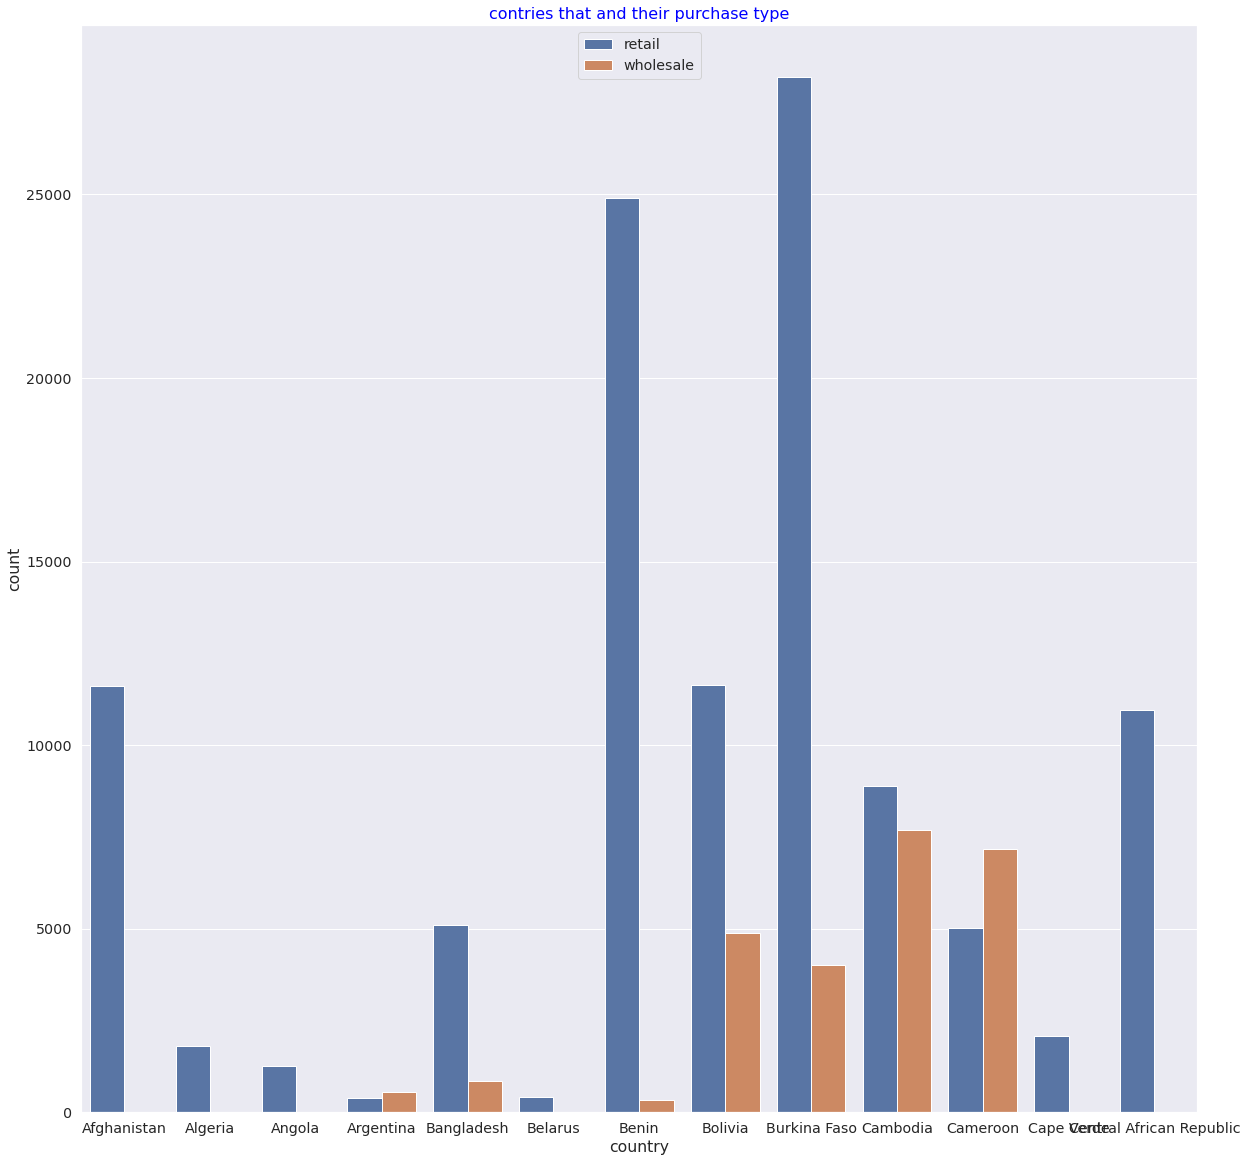

In [ ]:
# plotting the purchase type for the countries
plt.figure(figsize=(20,20))
sns.countplot(x='country', data=result_2, hue='purchase_type')
plt.legend(['retail', 'wholesale'])
plt.title('contries that and their purchase type', fontsize=16, color='blue')
plt.show();

The retail purchase type is the one commonly used.

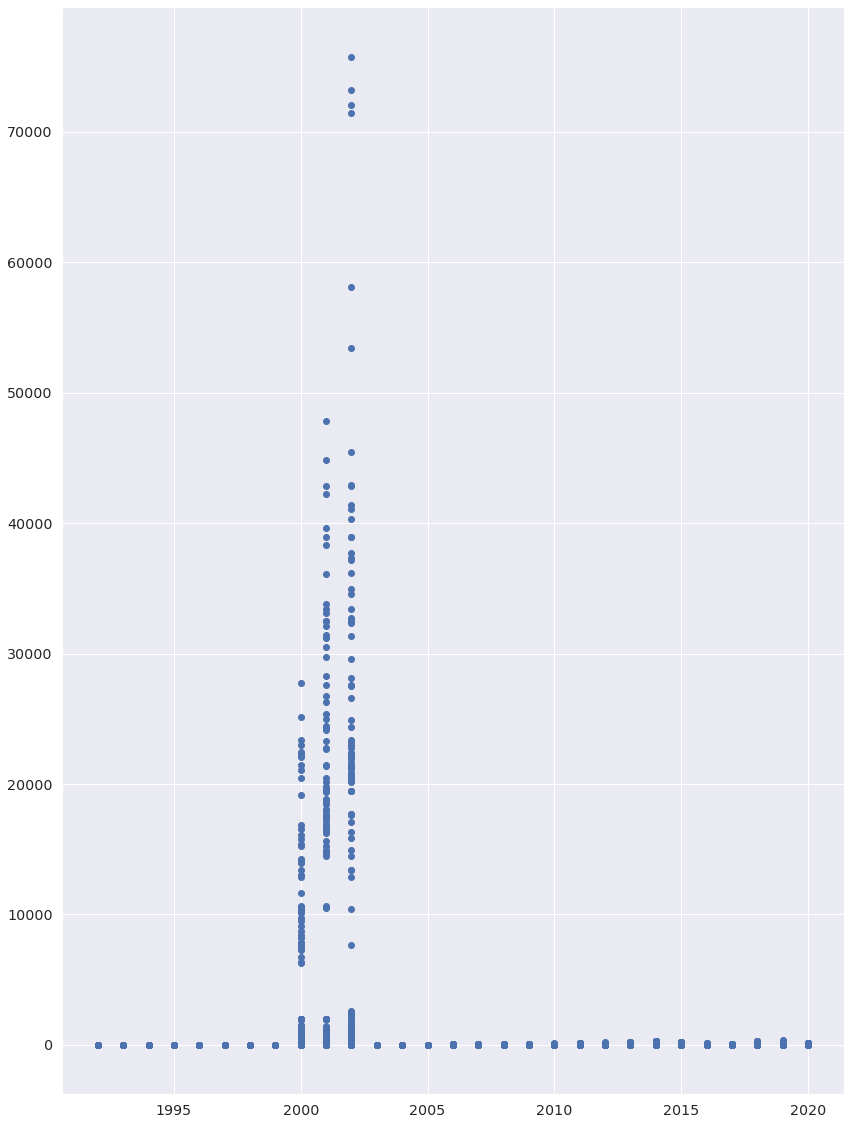

In [ ]:
# plotting year and price fluctuations
plt.scatter(result_2.year,result_2.price)
plt.show()

The prices have been having uniform fluctuations except for the years between 2000 to 2005

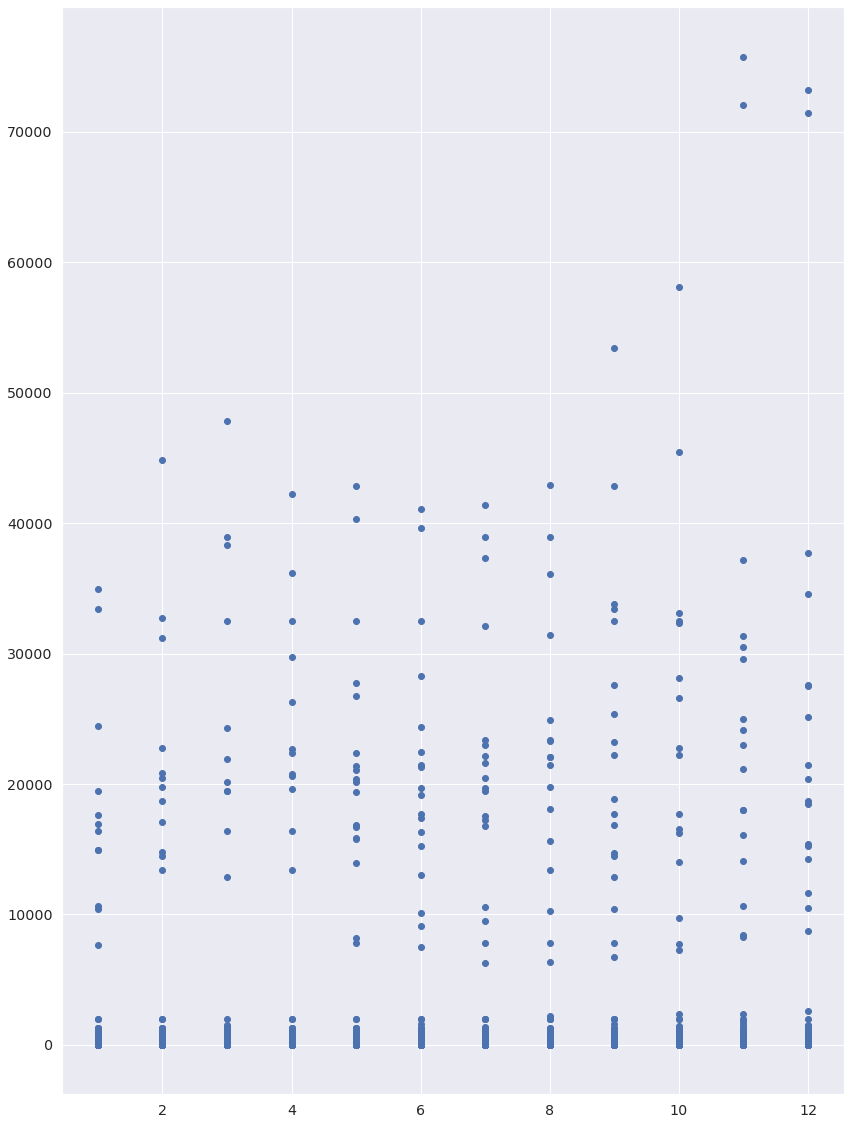

In [ ]:
# plotting month and price fluctuations

plt.scatter(result_2.month,result_2.price)
plt.show()

Most price fluctuations are at the begining and the end of the year. over the years.

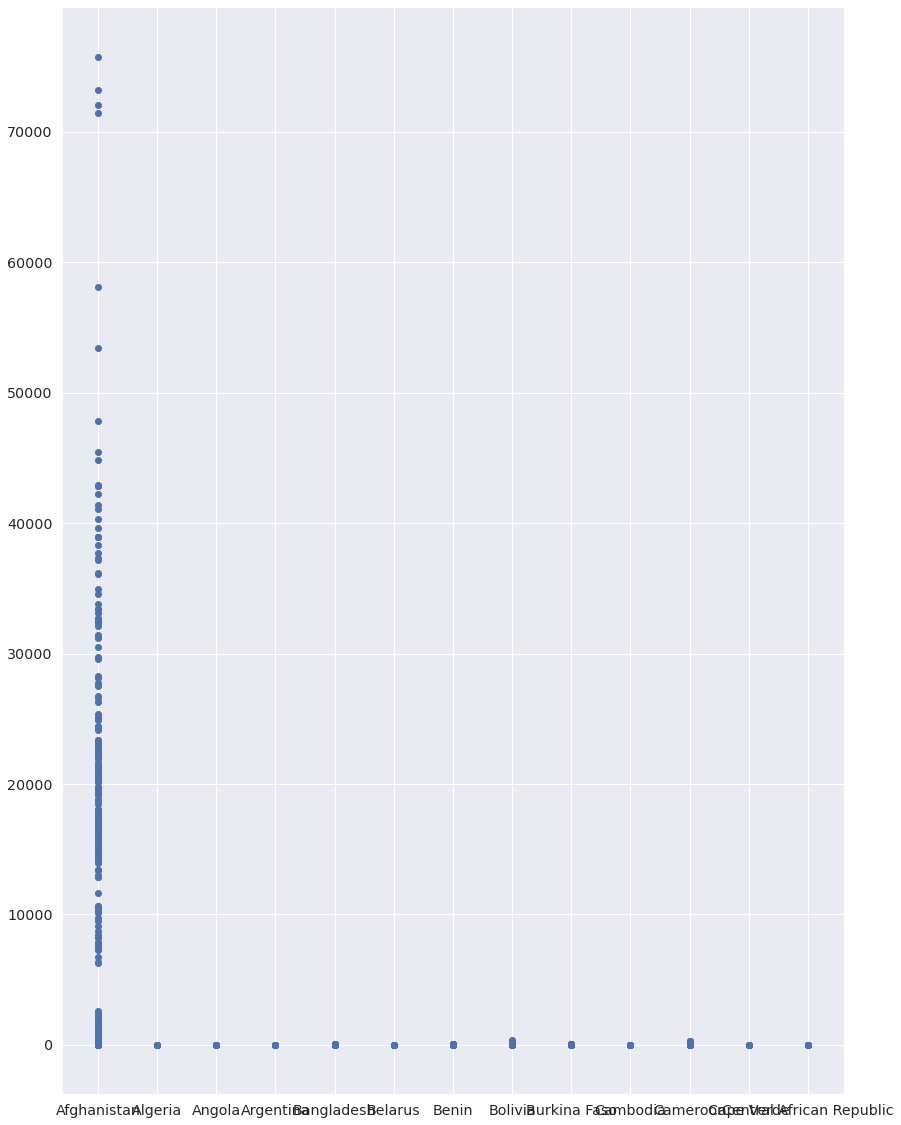

In [ ]:
# prices and the countries relationship
plt.scatter(result_2.country,result_2.price)
plt.show()

Most of the countries have almost the same pricing except the Afghanistan

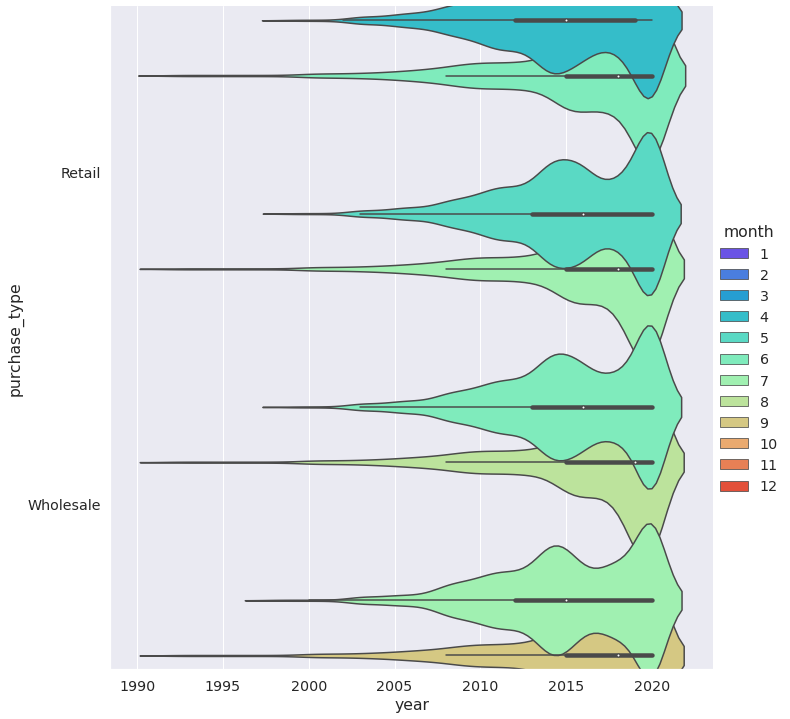

In [ ]:
# Plotting violin plots
  #

sns.catplot(x="year", y="purchase_type",hue="month", data=result_2,orient="h", height=10,width = 7,
            aspect=1, palette="rainbow", kind="violin", dodge=True, bw=.2)
plt.show()

### **iii) Multivariate Analysis**

We decided to use Factor analysis since our target variable is continous

#### **Factor Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# label encoding the food column
result_2['food'] = result_2['food'].astype('category')
result_2['food_encoded'] = result_2['food'].cat.codes

# label encoding the purchase_type	 column
result_2['purchase_type'] = result_2['purchase_type'].astype('category')
result_2['purchase_type_encoded'] = result_2['purchase_type'].cat.codes
result_2.head()

,country,province,city,food,currency,purchase_type,unit,month,year,price,food_encoded,purchase_type_encoded
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,0.64945,13,0
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,0.64945,13,0
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,0.64945,13,0
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,0.64945,13,0
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,0.64945,13,0


In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3


In [ ]:
#Adequacy Test
result_3 = result_2[['food_encoded', 'purchase_type_encoded', 'year', 'month']]

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(result_3)
chi_square_value, p_value


(3794.244116885879, 0.0)

since the p-value is 0.0 quarantees for the progressog the model.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(result_3)
kmo_model

0.5402921883253213

A kmo above 50% is good. for our case the ko is 54.03%

In [ ]:
#Choosing the Number of Factors

# Creating factor analysis object and perform factor analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(result_3, 4, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.193308
1,1.001728
2,0.927890
3,0.877075


Only two parameters had eigenvalues above 1.

In [ ]:
#Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(result_3, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
food_encoded,0.359653,-0.069240
purchase_type_encoded,0.307229,0.098380
year,-0.283690,0.167610
month,0.002185,-0.063217


Food and the purchase type had the highest factor loadings

In [ ]:
#Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,0.304225,0.046562
Proportion Var,0.076056,0.011641
Cumulative Var,0.076056,0.087697


We got a cummulative of 0.087679

### **~~ Multicollinearity**

In [ ]:
# finding the correlation matrix
corr = result_3[['food_encoded', 'purchase_type_encoded', 'year', 'month']].corr()
corr


,food_encoded,purchase_type_encoded,year,month
food_encoded,1.000000,0.103684,-0.113635,0.005163
purchase_type_encoded,0.103684,1.000000,-0.070668,-0.005548
year,-0.113635,-0.070668,1.000000,-0.011216
month,0.005163,-0.005548,-0.011216,1.000000


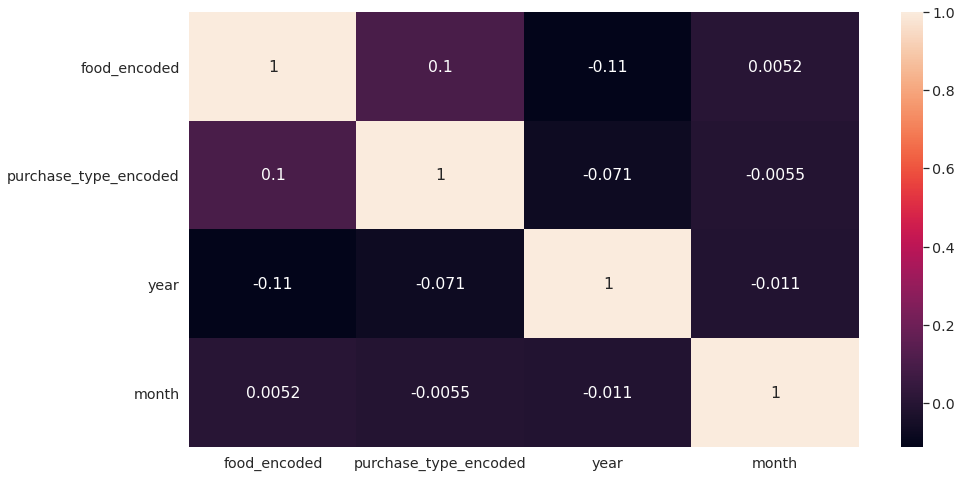

In [ ]:
# Creating a heatmap of the corr
#
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True)
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = result_3.columns

# calculating vif for each feature
vif_data['VIF'] = [variance_inflation_factor(result_3.values, i)
for i in range(len(result_3.columns))]

print(vif_data)

                 feature       VIF
0           food_encoded  4.374047
1  purchase_type_encoded  1.240070
2                   year  8.322005
3                  month  4.947721


In [ ]:
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
vif_df


,food_encoded,purchase_type_encoded,year,month
food_encoded,1.022630,-0.098339,0.109206,-0.004601
purchase_type_encoded,-0.098339,1.014516,0.060596,0.006816
year,0.109206,0.060596,1.016817,0.011177
month,-0.004601,0.006816,0.011177,1.000187


### **~~ Feature selection**

After carrying out Factor Analysis we and the Multicollinearity tests we found out that the Food type and the purchase types are the major determinants of the prices.

## **5. Modelling**

### **a) Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LinearRegression

In [ ]:
# assigning variables
X = result_2[['food_encoded', 'purchase_type_encoded', 'year', 'month']].values

y = result_2['price'].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making predictions
#
y_pred = regressor.predict(X_test)

In [ ]:
# Testing the model accurcy
regressor.score(X_test, y_test)

0.01206670092635953

In [ ]:
# Displaying parameters of the Linear regression model that can be tuned

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Creating a parameters dictionary

params = {'normalize': [True, False],
         'fit_intercept': [True, False]}


In [ ]:
# Creating a cross validation of 10 folds
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters

grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

In [ ]:
# Fitting the grid search 

grid_search_results = grid_search.fit(X_train, y_train)

# Displaying the best parameters and the the best score

print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -814385.5235501006 and the best parameters are {'fit_intercept': True, 'normalize': True}


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report

def linearmodel(X, y):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 9)
    
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients', reg.coef_)
print('Intercept',reg.intercept_)
print("R2_score : ", r2_score(y_test, y_pred))
print("mean_squared_error : ", mean_squared_error(y_test, y_pred))

Coefficients [ -25.53067233   -8.50980792 -100.64362048    3.61853245]
Intercept 37.553054341346375
R2_score :  0.01206670092635953
mean_squared_error :  1412046.4302331426


#### **Checking the appropriateness of the model using a residual plot**

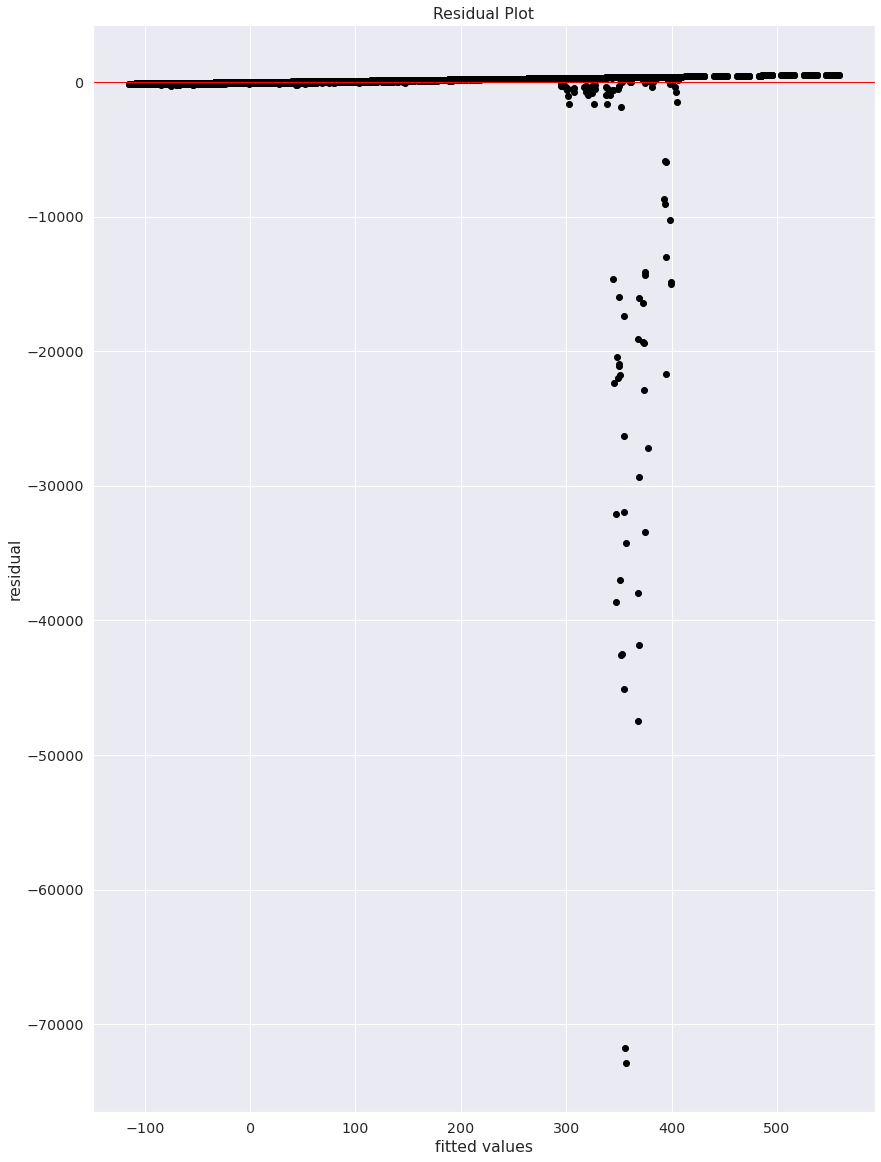

In [ ]:
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)

### **~~ Heteroskedasticity**

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')



inf
The test result of 97664.93 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


#### **Feature importance**

In [ ]:
# getting the importance
importance = regressor.coef_

# summarizing the feature iportance
for i, v in enumerate(importance):
  print('Feature: %od, Score: %.5f' % (i, v))

Feature: 0d, Score: -25.53067
Feature: 1d, Score: -8.50981
Feature: 2d, Score: -100.64362
Feature: 3d, Score: 3.61853


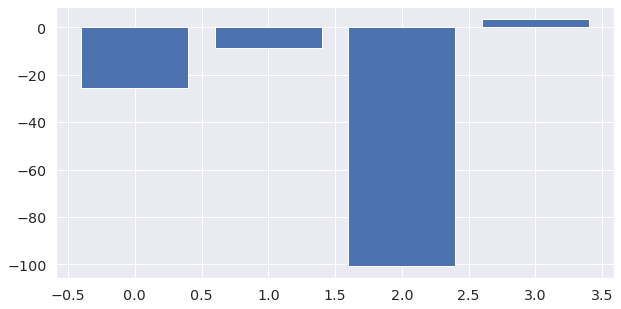

In [ ]:
# plotting feature importance
from matplotlib import pyplot
plt.figure(figsize=(10,5))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### **b) Polynoial Regression**

In [ ]:
# assigning variables
X = result_2[['food_encoded', 'purchase_type_encoded','year']].values

y = result_2['price'].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting the polynomial features to the X_train and X_test
#
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 20)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [ ]:
# training the dataset
polly_reg = LinearRegression()
polly_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making predictions
#
y_pred = polly_reg.predict(X_test)

In [ ]:
# Testing the model accurcy
polly_reg.score(X_test, y_test)

0.7891251534801288

### **c) Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# assigning variables
X = result_2[['food_encoded', 'purchase_type_encoded','year']].values

y = result_2['price'].values

In [ ]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [ ]:
# training the dataset
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Testing the model accurcy
ridge.score(X_test, y_test)

0.012025735304761698

#### **Ridge regression hyperameter tuning**

In [ ]:
# Training the model
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=Ridge(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 973.4097152411332 and the best parameters are {'alpha': 100.0}


#### **Training the model with optimal parameter**

In [ ]:
# Training the model with the optimal alpha value
#
ridge = Ridge(normalize=True, alpha = 100.0)
ridge.fit(X_train, y_train)

# Making predictions
#
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of Ridge: 1195.4769308206146
Mean of y: 39.83038767627525


#### **Performing cross validation to check for overfitting or underfitting**

In [ ]:
# Performing cross validation of ten folds
#
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score

scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 973.409715381966
Standard deviation of the cross validation scores is 2837602.745


### **d) Lasso Regression**

In [ ]:
# assigning variables
X = result_2[['food_encoded', 'purchase_type_encoded', 'year']].values

y = result_2['price'].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [ ]:
# Training the model
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
# Testing the model accurcy
lasso.score(X_test, y_test)

-9.071348710243399e-05

In [ ]:
# Displaying parameters of the Linear regression model that can be tuned

Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### **Lasso regression hyperameter tuning**

In [ ]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=Lasso(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 973.4098166882075 and the best parameters are {'alpha': 1.0}


In [ ]:
# Training the model with the optimal alpha value
#
lasso = Lasso(normalize=True, alpha = 100.0)
lasso.fit(X_train, y_train)

# Making predictions
#
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of Ridge: 1195.5847694811473
Mean of y: 39.83038767627525


### **e) Elastic Net Regression**

In [ ]:
# assigning variables
X = result_2[['food_encoded', 'purchase_type_encoded']].values

y = result_2['price'].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training the model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
elastic = ElasticNet(normalize=True)
elastic.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Testing the model accurcy
elastic.score(X_test, y_test)

-9.071348710243399e-05

#### **Hyperparameter tuning to find the optimal parameters for the model**

In [ ]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8),
         'l1_ratio':[.2,.4,.6,.8]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=ElasticNet(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 973.4098166882075 and the best parameters are {'alpha': 0.1, 'l1_ratio': 0.6}


**Training the model with optimal parameters**

In [ ]:
# Training the model with the optimal alpha value
#
elastic = ElasticNet(normalize=True, alpha = 1e-05, l1_ratio = 0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean of y: {y.mean()}')

RMSE of ElasticNet: 1195.402250467818
Mean of y: 39.83038767627525


### **f) Neural Networks**

In [ ]:
result_2['price'] = result_2['price'].replace(['NaN'],'0')
result_2['food_encoded'] = result_2['food_encoded'].replace(['NaN'],'0')
result_2['purchase_type_encoded'] = result_2['purchase_type_encoded'].replace(['NaN'],'0')

In [ ]:
# Import an Multi-Layer Perceptron Regressor model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPRegressor

from sklearn import metrics

In [ ]:
# assigning variables
X = result_2[['food_encoded', 'purchase_type_encoded', 'year']].values

y = result_2['price'].values

In [ ]:
# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 20)

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train )

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity')

# Fitting the model
mlp.fit(X_train,y_train)


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Since we are doing a linear regression then we don't really need the activation function so we use activation as identity

In [ ]:
# Making predictions
y_pred = mlp.predict(X_test)

In [ ]:
mlp([[1, 2, 4, ]])

## **Recomendation**

The most powerful model we can recomend to be used is the Polynimial regression since it has the highest predictability score compared to other types of regression 